# 1.0 IMPORT NECESSARY LIBRARIES

In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime

# 2.0 IMPORT DATA

In [39]:
# Import data
df=pd.read_csv(r'E:\Coding and Data\PYTHON- DATA SCIENCE\Data hub\Employe_Performance_dataset.csv')
# read the first 10 rows
df.head(10)

,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,NaN,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening
5,6,Ashley Howe,29,Female,HR,2591,2016-06-24,1.0,6,Active,Chicago,Evening
6,7,David Olson,39,Female,Sales,6826,2023-05-11,NaN,4,Active,New York,Night
7,8,Amanda Baker,52,Other,HR,6285,2015-04-01,NaN,8,Inactive,Chicago,Evening
8,9,Jeremy Wright,63,Female,Sales,9862,2024-02-07,NaN,3,Inactive,New York,Night
9,10,Brian Faulkner,30,Male,IT,8202,2018-05-26,1.0,9,Active,Los Angeles,Morning


# 3.0 DATA CLEANING

In [40]:
# shape of the dataset
df.shape

(1000, 12)

In [41]:
# Check data type of all column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Gender             1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Salary             1000 non-null   int64  
 6   Joining Date       1000 non-null   object 
 7   Performance Score  502 non-null    float64
 8   Experience         1000 non-null   int64  
 9   Status             1000 non-null   object 
 10  Location           1000 non-null   object 
 11  Session            1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [42]:
# Convert columns into correct data types
df['Name']=df['Name'].astype('string')
df['ID']=df['ID'].astype('string')
df['Gender']=df['Gender'].astype('string')
df['Department']=df['Department'].astype('string')
df['Joining Date']=pd.to_datetime(df['Joining Date'])
df['Status']=df['Status'].astype('string')
df['Location']=df['Location'].astype('string')
df['Session']=df['Session'].astype('string')

In [43]:
# Check for duplicate entries
df.duplicated().sum()

0

In [44]:
# Check for missing entries
df.isnull().sum()

ID                     0
Name                   0
Age                    0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Performance Score    498
Experience             0
Status                 0
Location               0
Session                0
dtype: int64

In [45]:
# Fill the missing values of performance score
# first, create a new column "Experience Level" with values "Junior", "Mid", or "Senior" based on the Experience.
# then define a function to assign experience level
def assign_experience_level(experience):
    if experience <= 6:
        return 'Entry-level'
    elif 6 <= experience <= 12:
        return 'Intermediate'
    else:
        return 'Experienced'
# create the new column now
df['Experience Level']=df['Experience'].apply(assign_experience_level)

"""The following code replaces any missing (NaN) values in the Performance Score column with the median
of the Performance Score for each combination of Department and Experience Level. Median is preferred because
it is a robust estimator (cannot be affected by outliers)"""

df['Performance Score']=df.groupby(['Department', 'Experience Level'])['Performance Score'].transform(lambda x: x.fillna(x.median()))

In [46]:
# convert to correct dtype
df['Experience Level']=df['Experience Level'].astype('string')

In [47]:
# Confirm that there is no missing values
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Gender               0
Department           0
Salary               0
Joining Date         0
Performance Score    0
Experience           0
Status               0
Location             0
Session              0
Experience Level     0
dtype: int64

In [48]:
# Add a new column Age Group with values "Young", "Middle-aged", or "Senior" based on Age
def assign_age_group (age):
    if age <=35:
        return 'Young'
    elif age <=50 :
        return 'Middle-aged'
    else:
        return 'Senior'
df['Age Group']=df['Age'].apply(assign_age_group)
    
    

In [49]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Department', 'Salary', 'Joining Date',
       'Performance Score', 'Experience', 'Status', 'Location', 'Session',
       'Experience Level', 'Age Group'],
      dtype='object')

In [50]:
# Re-index the dataframe to make columns follow a better order
df=df.reindex(['ID', 'Name', 'Age','Age Group', 'Gender', 'Department', 'Salary', 'Joining Date',
       'Performance Score', 'Experience', 'Experience Level','Status', 'Location', 'Session'],axis=1)
df.head(10) #show first 10 rows

,ID,Name,Age,Age Group,Gender,Department,Salary,Joining Date,Performance Score,Experience,Experience Level,Status,Location,Session
0,1,Cory Escobar,48,Middle-aged,Female,HR,5641,2015-05-03,2.0,16,Experienced,Active,New York,Night
1,2,Timothy Sanchez,25,Young,Other,Sales,4249,2020-11-09,2.0,11,Intermediate,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Senior,Other,Sales,3058,2019-02-12,3.0,1,Entry-level,Inactive,New York,Morning
3,4,Christine Williams,58,Senior,Female,IT,5895,2017-09-08,2.0,13,Experienced,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Young,Other,IT,4317,2020-02-15,5.0,16,Experienced,Inactive,New York,Evening
5,6,Ashley Howe,29,Young,Female,HR,2591,2016-06-24,1.0,6,Entry-level,Active,Chicago,Evening
6,7,David Olson,39,Middle-aged,Female,Sales,6826,2023-05-11,3.0,4,Entry-level,Active,New York,Night
7,8,Amanda Baker,52,Senior,Other,HR,6285,2015-04-01,3.0,8,Intermediate,Inactive,Chicago,Evening
8,9,Jeremy Wright,63,Senior,Female,Sales,9862,2024-02-07,3.0,3,Entry-level,Inactive,New York,Night
9,10,Brian Faulkner,30,Young,Male,IT,8202,2018-05-26,1.0,9,Intermediate,Active,Los Angeles,Morning


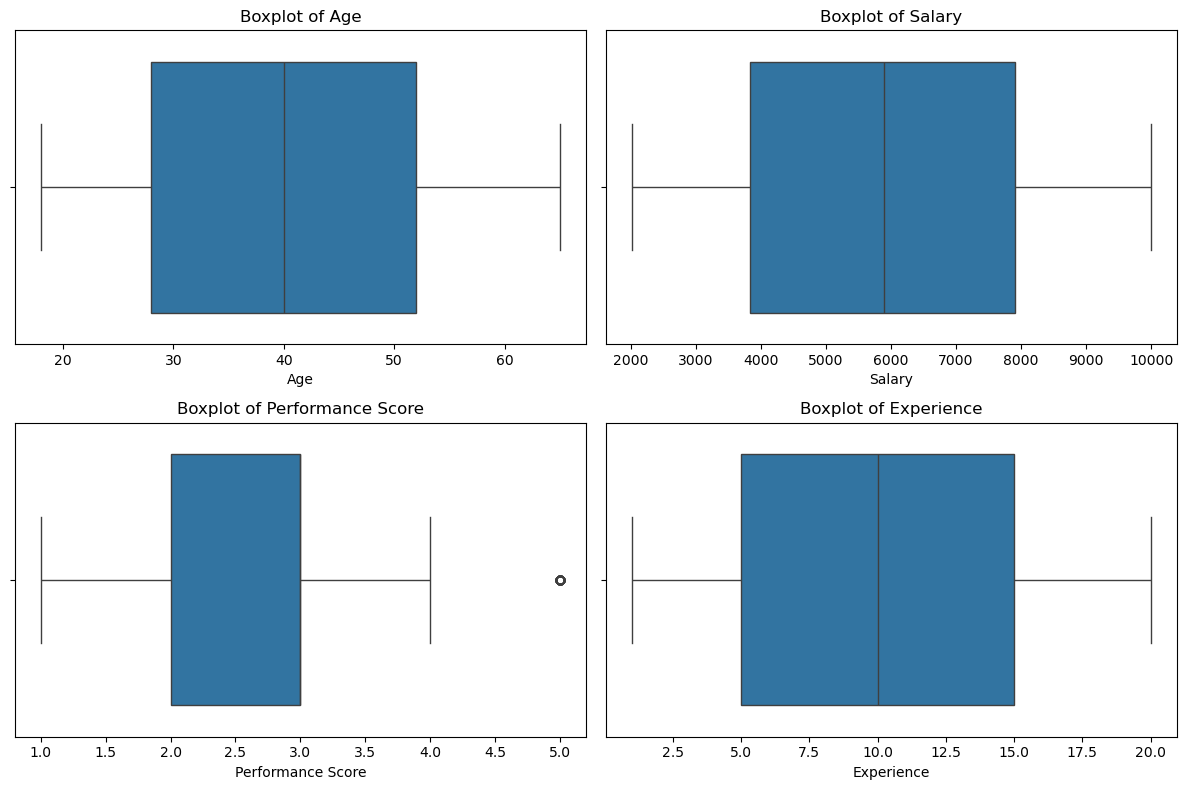

In [51]:
# Look for outliers
# List of numeric columns to plot boxplots
numeric_columns = ['Age', 'Salary', 'Performance Score', 'Experience']

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Loop over the numeric columns to create individual boxplots
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # Creating a 2x2 grid for boxplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout and display
plt.tight_layout()
plt.show()

As observed above, there are no alarming outliers in the data.

# 4.0 DESCRIPTIVE ANALYSIS

## 4.1 Summary Statistics of Numerical Data

In [52]:
df.describe()

,Age,Salary,Joining Date,Performance Score,Experience
count,1000.000000,1000.000000,1000,1000.000000,1000.000000
mean,40.782000,5917.374000,2020-01-04 21:23:02.400000,2.901000,10.120000
min,18.000000,2015.000000,2014-12-11 00:00:00,1.000000,1.000000
25%,28.000000,3829.750000,2017-08-22 06:00:00,2.000000,5.000000
50%,40.000000,5889.000000,2020-03-01 12:00:00,3.000000,10.000000
75%,52.000000,7903.250000,2022-05-30 00:00:00,3.000000,15.000000
max,65.000000,9993.000000,2024-12-07 00:00:00,5.000000,20.000000
std,14.124871,2299.418003,NaN,1.032601,5.713689


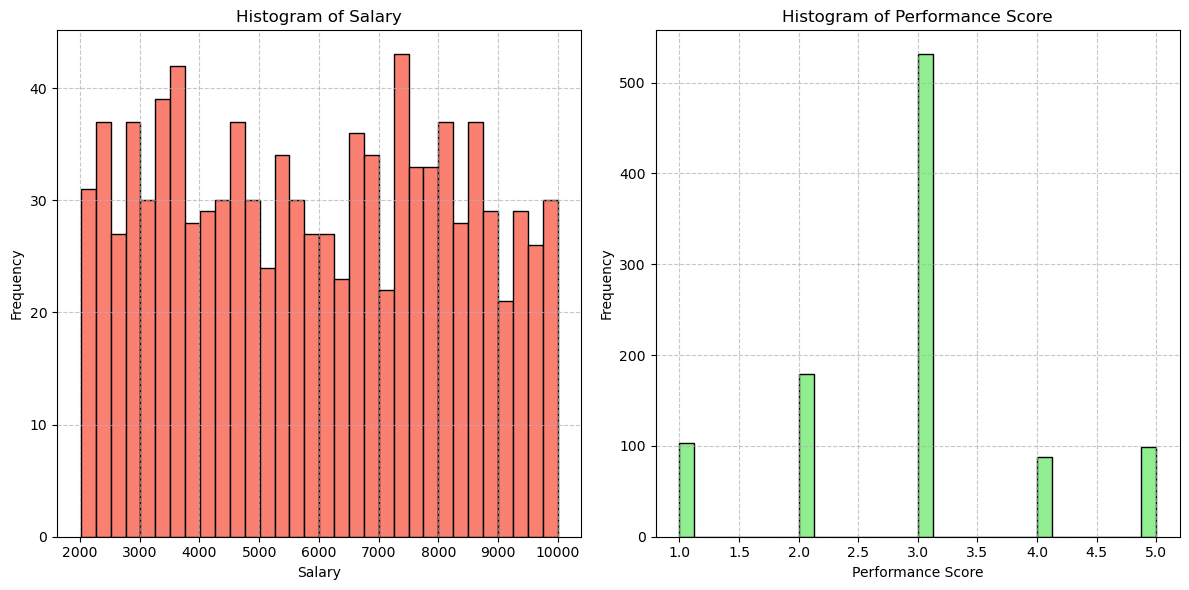

In [53]:
# Create subplots for histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Histogram for Salary
axes[0].hist(df['Salary'], bins=32, color='salmon', edgecolor='black')
axes[0].set_title('Histogram of Salary')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot Histogram for Performance Score
axes[1].hist(df['Performance Score'], bins=32, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram of Performance Score')
axes[1].set_xlabel('Performance Score')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.7)


# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

As it can be observed in above histograms, Salary has a uniform distribution while performance score has normal distribution. 

A uniform salary histogram indicates that salaries are evenly distributed across all ranges, with no specific bracket dominating. This suggests a balanced pay structure where employees are equally spread across low, middle, and high salary categories. It could reflect equitable pay practices, minimal differentiation between roles, or standardized pay scales. 

A performance score histogram showing a normal distribution indicates that most employees' scores cluster around the average, with fewer employees achieving extremely high or low scores. This pattern often arises when performance is influenced by multiple independent factors, such as skill, experience, motivation, and training, which collectively create a balanced distribution. The bell-shaped curve suggests consistency in the evaluation process and the absence of significant biases or anomalies. It also reflects natural variability among individuals, where most perform near the mean, and only a few excel or struggle significantly. This normal distribution helps in benchmarking and setting realistic performance standards.

## 4.2 Summary Statistics of Categorical Data

Age Group
Young          403
Senior         301
Middle-aged    296
Name: count, dtype: int64
Gender
Other     340
Female    332
Male      328
Name: count, dtype: Int64
Department
IT       339
Sales    338
HR       323
Name: count, dtype: Int64
Experience Level
Experienced     364
Intermediate    327
Entry-level     309
Name: count, dtype: Int64
Status
Active      501
Inactive    499
Name: count, dtype: Int64
Location
Los Angeles    335
Chicago        333
New York       332
Name: count, dtype: Int64


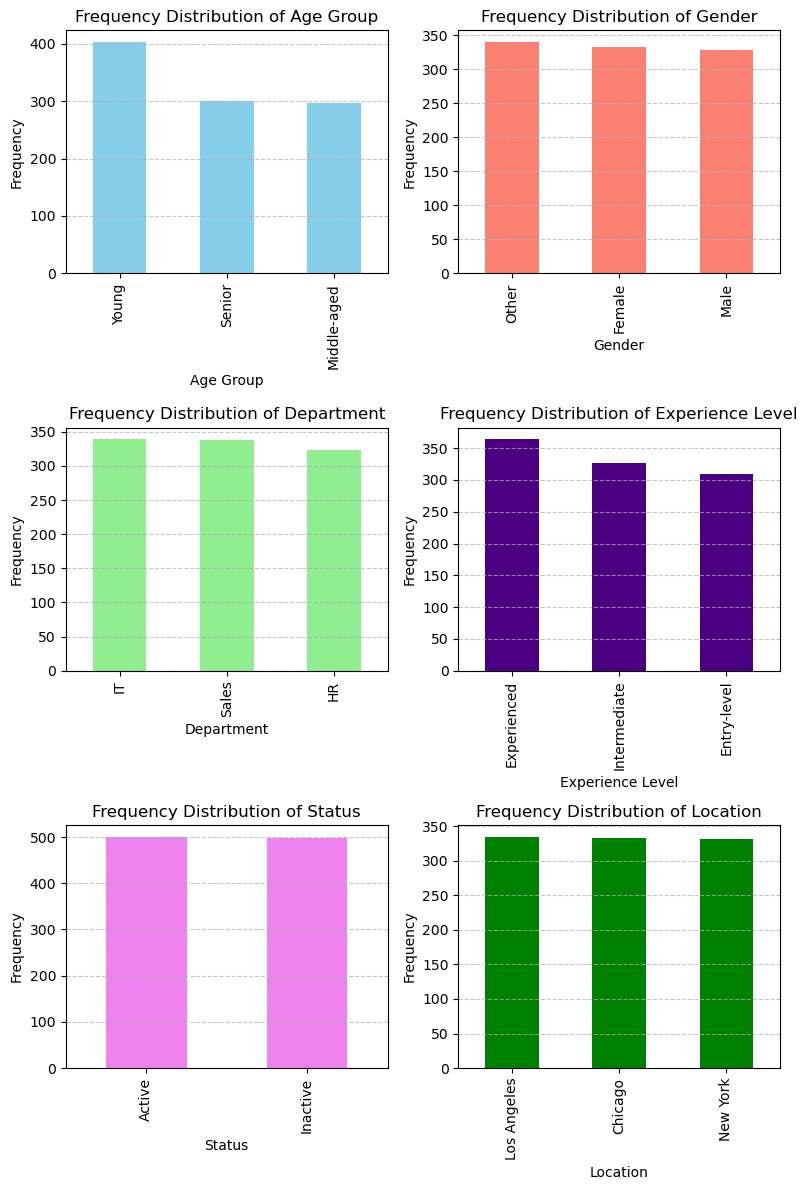

In [54]:
# Print value counts per category
print(df['Age Group'].value_counts())
print(df['Gender'].value_counts())
print(df['Department'].value_counts())
print(df['Experience Level'].value_counts())
print(df['Status'].value_counts())
print(df['Location'].value_counts())
# Create subplots for categorical frequency distributions
fig, axes = plt.subplots(3, 2, figsize=(8, 12))

# Plot Frequency Distribution for 'Age Group'
df['Age Group'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Frequency Distribution of Age Group')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Frequency Distribution for 'Gender'
df['Gender'].value_counts().plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Frequency Distribution of Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Frequency Distribution for 'Department'
df['Department'].value_counts().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Frequency Distribution of Department')
axes[1, 0].set_xlabel('Department')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Frequency Distribution for 'Experience Level'
df['Experience Level'].value_counts().plot(kind='bar', ax=axes[1, 1], color='indigo')
axes[1, 1].set_title('Frequency Distribution of Experience Level')
axes[1, 1].set_xlabel('Experience Level')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Frequency Distribution for 'Status'
df['Status'].value_counts().plot(kind='bar', ax=axes[2, 0], color='violet')
axes[2, 0].set_title('Frequency Distribution of Status')
axes[2, 0].set_xlabel('Status')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Frequency Distribution for 'Location'
df['Location'].value_counts().plot(kind='bar', ax=axes[2, 1], color='green')
axes[2, 1].set_title('Frequency Distribution of Location')
axes[2, 1].set_xlabel('Location')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

As observed from the above bar graphs, the age group distribution shows that the majority of employees (403) are young, suggesting the organization has a predominantly youthful workforce. This could reflect hiring trends that favor recent graduates or junior-level professionals, possibly aligning with growth-oriented roles or entry-level positions. With 301 senior employees, the organization maintains a significant number of experienced staff, likely contributing leadership and expertise. Middle-aged employees (296) form a balanced bridge, ensuring a diverse and multigenerational team.
The gender distribution shows a remarkable balance among employees, with 340 identifying as "Other," 332 as female, and 328 as male. This suggests the organization embraces inclusivity and diversity, particularly in recognizing non-binary or other gender identities. The near-equal representation across genders indicates equitable hiring practices and a commitment to fostering a diverse workplace, which can enhance creativity, collaboration, and overall organizational performance.
The departmental distribution reveals a well-balanced workforce, with IT (339 employees), Sales (338 employees), and HR (323 employees) having near-equal representation. This balance suggests that the organization values the strategic importance of each department equally, ensuring robust operations across technology, revenue generation, and employee management. Such distribution highlights a commitment to supporting both core business functions, like IT and Sales, and enabling functions like HR, fostering a well-rounded and efficient organizational structure.
The experience level distribution shows a balanced workforce, with seniors (364) slightly outnumbering mid-level (327) and junior employees (309). This suggests the organization values experienced professionals for leadership and strategic roles while maintaining a strong presence of mid-level and junior staff for operational and entry-level functions. This distribution supports knowledge transfer, mentorship, and long-term sustainability, creating a dynamic workforce capable of addressing both current needs and future organizational growth.
The status distribution, with 501 active and 499 inactive employees, shows a near-equal split, indicating a stable workforce. This balance suggests that the organization likely has effective retention strategies and relatively low turnover. It may also point to occasional workforce adjustments or temporary inactivity among some employees.
The location distribution shows nearly equal representation across three major cities: Los Angeles (335), Chicago (333), and New York (332). This indicates the organization has a well-distributed presence across key regions, ensuring diverse market reach and operational capacity. It also suggests a balanced focus on regional growth, with each location likely playing a vital role in the company’s overall strategy and fostering a geographically diversified workforce.

## 4.3 Correlation Coefficients between Numerical Variables

Spearman Correlation Matrix:
                        Age    Salary  Performance Score  Experience
Age                1.000000 -0.029650          -0.054717    0.004722
Salary            -0.029650  1.000000           0.003966    0.004452
Performance Score -0.054717  0.003966           1.000000   -0.094580
Experience         0.004722  0.004452          -0.094580    1.000000


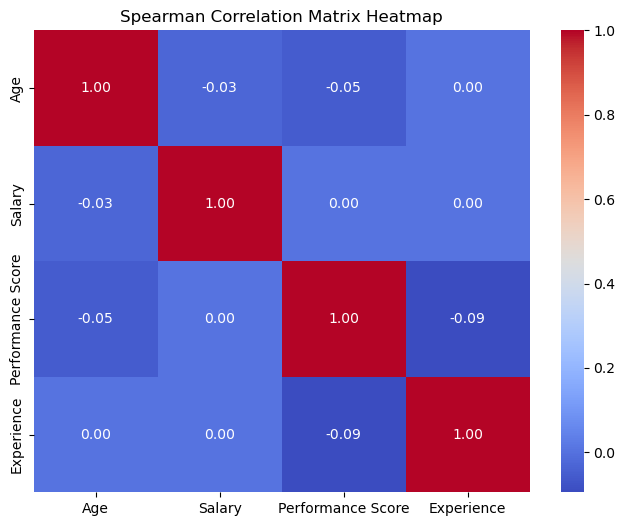

In [55]:

# Compute Spearman correlation matrix for nonlinear relationship
nonlinear_data = df[['Age', 'Salary', 'Performance Score', 'Experience']]

# Compute the Spearman correlation matrix
spearman_corr_matrix = nonlinear_data.corr(method='spearman')

# Display the Spearman correlation matrix
print("Spearman Correlation Matrix:")
print(spearman_corr_matrix)

# Plot the Spearman correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()


In real-world scenarios, salary often increases with age up to a point (mid-career) and may plateau or 
decrease later, forming a non-linear curve.
Performance may initially improve with experience before plateauing, or highly experienced employees 
may focus on leadership roles rather than measurable individual performance, indicating a non-linear trend.
Also,age and performance are likely to have a non-linear relationship because an employee's performance trajectory can vary significantly depending on their career stage, personal goals, role expectations, and shifting responsibilities over time. To delve depeer using the above analysis results:

Age vs. Salary (-0.0297): The very weak negative monotonic correlation suggests no significant relationship between age and salary. This could imply that salary progression in the organization is not tied to age, potentially indicating that promotions or pay increases are based on other factors like performance or role changes rather than age or tenure.

Performance Score vs. Experience (-0.0946): The weak negative correlation suggests that as employees gain more experience, their performance scores slightly decline. This could reflect changes in priorities, such as experienced employees transitioning to roles where individual performance is less emphasized, or it might indicate evaluation biases against highly experienced staff.

Age vs. Performance Score (-0.05472): The weak negative correlation suggests that age has almost no direct impact on performance scores. This minimal relationship implies that performance evaluations in the organization are not strongly tied to age.The fact that the correlation is so close to zero indicates a lack of consistent increase or decrease in performance scores as employees get older. It may reflect a diverse workforce where age doesn't significantly affect performance outcomes, or it could signal well-balanced evaluations that don't disproportionately favor certain age groups.

# 5.0 GROUP ANALYSIS

## 5.1 Performance disparity across departments

Department
HR       2.925697
IT       2.988201
Sales    2.789941
Name: Performance Score, dtype: float64


<Axes: title={'center': 'Performance Per Department'}, xlabel='Department', ylabel='Performance score'>

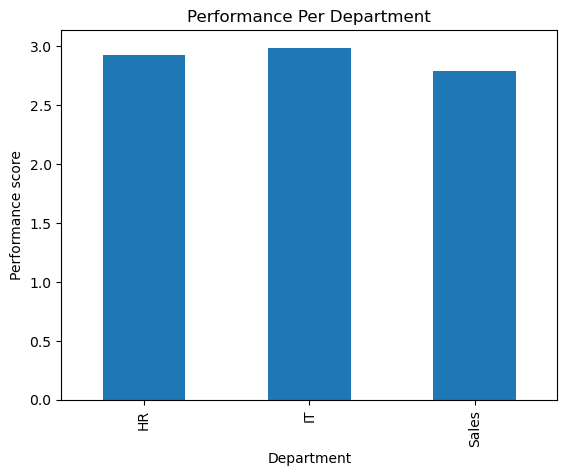

In [56]:
g1=df.groupby('Department')['Performance Score'].mean()
print(g1)
g1.plot(kind='bar', ylabel='Performance score', title='Performance Per Department')

As observed above, the performance scores indicate IT leads with 2.99, reflecting strong efficiency or results, followed by HR at 2.93, showing consistent performance in managing organizational needs. Sales scores lowest at 2.79, potentially impacted by high-pressure targets. Focused support and incentives in Sales could help boost overall performance while maintaining IT's edge.

## 5.2 Payment Disparity across departments

Department
HR       5982.396285
IT       5968.371681
Sales    5804.088757
Name: Salary, dtype: float64


<Axes: title={'center': 'Salary Per Department'}, xlabel='Department', ylabel='Salary'>

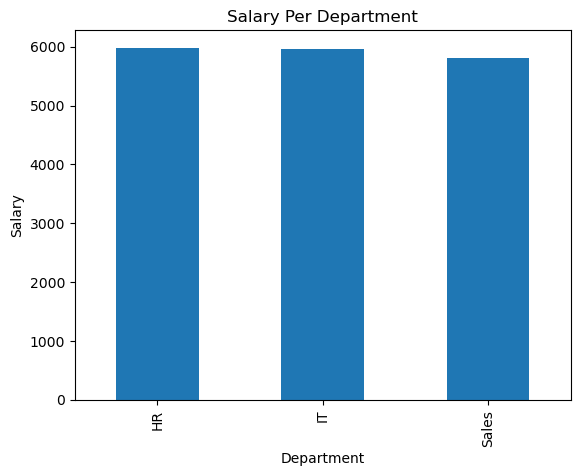

In [57]:
g2=df.groupby('Department')['Salary'].mean()
print(g2)
g2.plot(kind='bar', ylabel='Salary', title='Salary Per Department')

As observed above, the salary data indicates slight variations across departments. HR has the highest average salary (5982.40), which could reflect compensation for roles requiring specialized knowledge in people management or compliance. IT follows closely (5968.37), suggesting competitive pay for technical expertise in managing systems and innovation. Sales has the lowest average salary (5804.09), which may be offset by performance-based incentives like commissions. The relatively small differences suggest a fair compensation structure across departments. To maintain equity and motivation, the organization could periodically review salary scales, ensuring alignment with market trends and recognizing contributions unique to each department.

## 5.3 Department-wise Count of Active/Inactive Employees

Department  Status  
HR          Active      157
            Inactive    166
IT          Active      171
            Inactive    168
Sales       Active      173
            Inactive    165
Name: Status, dtype: int64


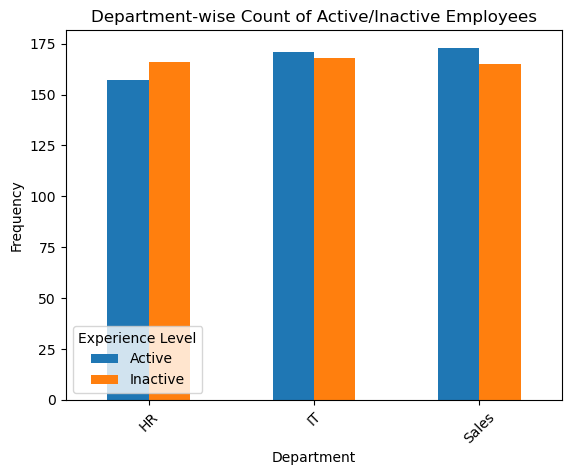

In [58]:

g3=df.groupby(['Department', 'Status'])['Status'].count()
print(g3)
# Generate a list of unique departments to assign colors
unique_departments = df['Department'].unique()
colors = matplotlib.colormaps['tab10'](range(len(unique_departments)))

# Plotting the bar chart with distinct colors for each department
g3.unstack().plot(kind='bar', ylabel='Frequency', xlabel='Department', color=colors)
# Move the legend to a better position to ensure no bar is hidden by the legend
plt.legend(title='Experience Level', loc='lower left')
plt.title('Department-wise Count of Active/Inactive Employees')
plt.xticks(rotation=45)
plt.show()

The above data highlights that the workforce is nearly balanced between active and inactive employees, with active employees slightly leading. The HR department stands out, having more inactive employees (166) than active ones (157), suggesting potential issues like turnover or internal challenges. The Sales department has the highest active count (173), emphasizing its strategic importance but also reflecting potential concerns with 165 inactive employees, possibly due to high pressure or burnout. Meanwhile, IT shows stability, with active (171) and inactive (168) numbers closely matched. The organization should investigate HR challenges and focus on retention strategies while leveraging the active workforce in Sales and IT.

## 5.4 Age-group disparity across departments

Department  Age Group  
HR          Middle-aged     93
            Senior          92
            Young          138
IT          Middle-aged    104
            Senior          98
            Young          137
Sales       Middle-aged     99
            Senior         111
            Young          128
Name: Age Group, dtype: int64


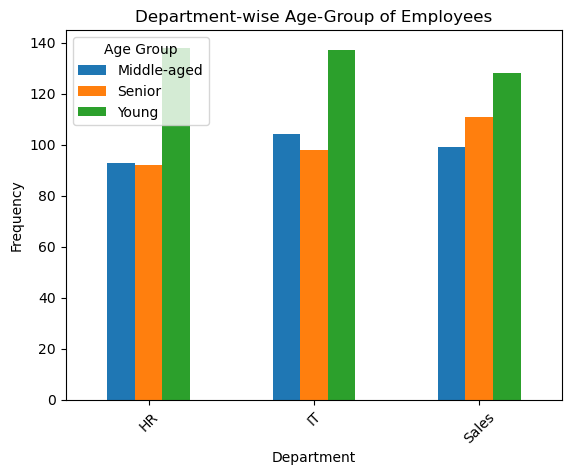

In [59]:
g4=df.groupby(['Department', 'Age Group'])['Age Group'].count()
print(g4)
# Generate a list of unique departments to assign colors
unique_departments = df['Department'].unique()
colors = matplotlib.colormaps['tab10'](range(len(unique_departments)))

# Plotting the bar chart with distinct colors for each department
g4.unstack().plot(kind='bar', ylabel='Frequency', xlabel='Department', color=colors)

plt.title('Department-wise Age-Group of Employees')
plt.xticks(rotation=45)
plt.show()

The above analysis shows a diverse workforce across departments and age groups. Young employees dominate in all departments, particularly in HR (138), indicating a strong influx of early-career professionals. Middle-aged employees are fairly consistent, with IT leading at 104, reflecting a stable mid-career workforce. Seniors are most prominent in Sales (111), suggesting experienced leadership in this revenue-critical area. HR and IT have a balanced senior representation (92 and 98, respectively). The emphasis on younger talent hints at future growth potential, but nurturing senior mentorship and retaining mid-career employees will be vital for sustained departmental and organizational success.

## 5.5 Experience Level Across Departments

Department  Experience Level
HR          Entry-level          90
            Experienced         132
            Intermediate        101
IT          Entry-level         115
            Experienced         123
            Intermediate        101
Sales       Entry-level         104
            Experienced         109
            Intermediate        125
Name: Experience Level, dtype: int64


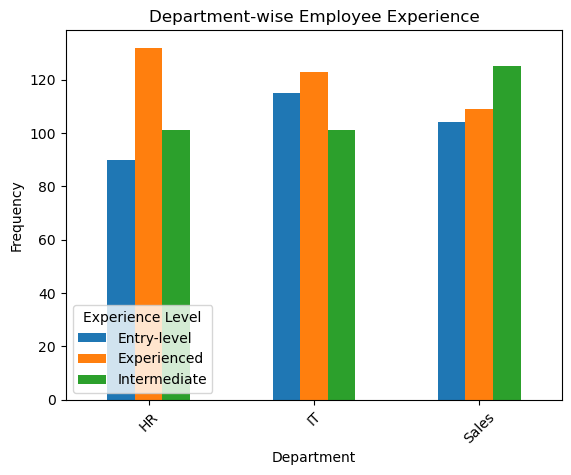

In [60]:
g5=df.groupby(['Department', 'Experience Level'])['Experience Level'].count()
print(g5)
# Generate a list of unique departments to assign colors
unique_departments = df['Department'].unique()
colors = matplotlib.colormaps['tab10'](range(len(unique_departments)))

# Plotting the bar chart with distinct colors for each department
g5.unstack().plot(kind='bar', ylabel='Frequency', xlabel='Department', color=colors)

plt.title('Department-wise Employee Experience')
plt.xticks(rotation=45)
# Move the legend to a better position to ensure no bar is hidden by the legend
plt.legend(title='Experience Level', loc='lower left')

plt.show()

The data reveals a balanced distribution of experience levels across departments. Experienced employees lead in HR (132) and IT (123), reflecting strong leadership and expertise in these areas. In Sales, intermediate employees dominate (125), suggesting a focus on mid experienced professionals for critical revenue-driving roles. Entry-level employees are most prominent in IT (115), indicating efforts to nurture entry-level talent in tech-related roles, while Sales and HR follow closely. The organization benefits from a healthy mix of experience levels, but maintaining growth paths for entry-level workers, retaining intermediate talent, and leveraging experienced expertise will be key to ensuring workforce stability and growth.

## 5.6 Department against their work sessions.

Department  Session
HR          Evening    102
            Morning    105
            Night      116
IT          Evening    100
            Morning    122
            Night      117
Sales       Evening    124
            Morning    107
            Night      107
Name: Session, dtype: int64


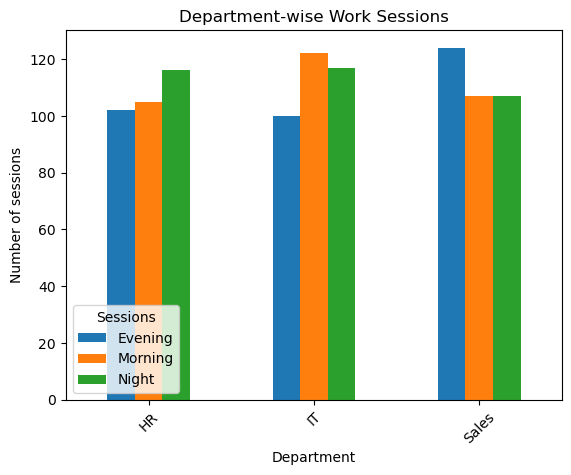

In [74]:
g6=df.groupby(['Department', 'Session'])['Session'].count()
print(g6)
# Generate a list of unique departments to assign colors
unique_departments = df['Department'].unique()
colors = matplotlib.colormaps['tab10'](range(len(unique_departments)))

# Plotting the bar chart with distinct colors for each department
g6.unstack().plot(kind='bar', ylabel='Number of sessions', xlabel='Department', color=colors)

plt.title('Department-wise Work Sessions')
plt.xticks(rotation=45)

# Move the legend to a better position to ensure no bar is hidden by the legend
plt.legend(title='Sessions', loc='lower left')

plt.show()

As observed above, night shifts dominate in HR (116) and IT (117), reflecting the need for round-the-clock operational or support roles. In Sales, evening shifts are highest (124), likely catering to customer availability or peak sales hours. Morning shifts are consistent across departments, with IT leading at 122, indicating a preference for standard daytime operations. HR shows a balanced spread across all sessions, while Sales focuses more on evenings. This distribution highlights operational priorities, and optimizing shift allocation based on employee preferences and workload demands could improve productivity and job satisfaction across departments.

## 5.7 Performance Rate Across Age-groups

Age Group
Middle-aged    2.841216
Senior         2.843854
Young          2.987593
Name: Performance Score, dtype: float64


<Axes: title={'center': 'Age Group Performance'}, xlabel='Age Group', ylabel='Performance Score'>

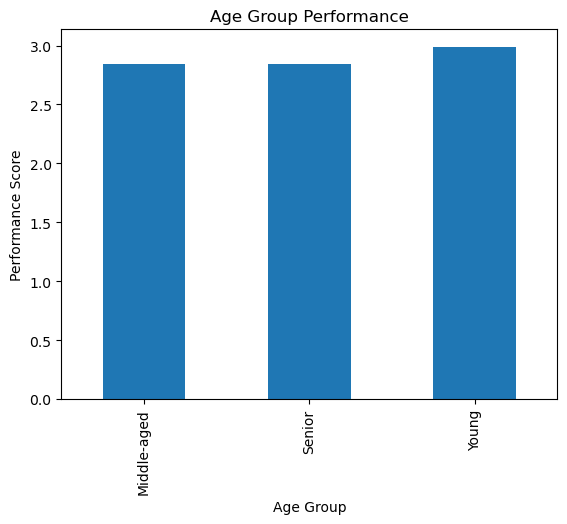

In [62]:
g7=df.groupby('Age Group')['Performance Score'].mean()
print(g7)
g7.plot(kind='bar', ylabel='Performance Score', title='Age Group Performance')

As seen above, the performance scores reveal that young employees have the highest average performance score (2.99), suggesting high energy, adaptability, and possibly a willingness to innovate or take on challenges. Senior employees follow closely with a score of 2.84, indicating that experience contributes to consistent, reliable performance. Middle-aged employees have a slightly lower score (2.84), which could reflect a balance between experience and potential stagnation in performance. The data suggests that younger employees are excelling in their roles, while both senior and middle-aged employees provide valuable stability and expertise. Fostering a culture of continuous growth across all age groups can enhance overall performance.

## 5.8 Performance Rate Across Locations

Location
Chicago        2.933934
Los Angeles    2.889552
New York       2.879518
Name: Performance Score, dtype: float64


<Axes: title={'center': 'Performance disparity across Locations'}, xlabel='Location', ylabel='Performance score'>

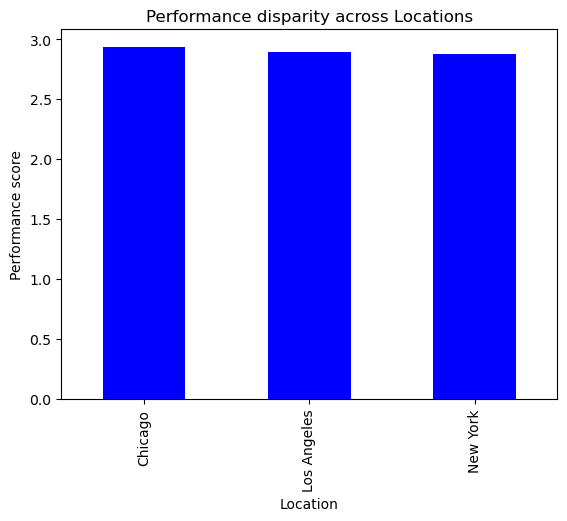

In [66]:
g9=df.groupby('Location')['Performance Score'].mean()
print(g9)
g9.plot(kind='bar', ylabel='Performance score', title='Performance disparity across Locations', color='b')

As shown above, Chicago has the highest performance score at 2.933934, followed by Los Angeles with 2.889552, and New York with the lowest score of 2.879518. This suggests that employees or entities in Chicago perform slightly better on average than those in Los Angeles and New York. Further analysis could explore factors influencing these variations, such as industry, local conditions, or management practices.

## 5.9 Performance Rate Across Sessions

Session
Evening    2.917178
Morning    2.904192
Night      2.882353
Name: Performance Score, dtype: float64


<Axes: title={'center': 'Performance Per Session'}, xlabel='Session', ylabel='Performance Score'>

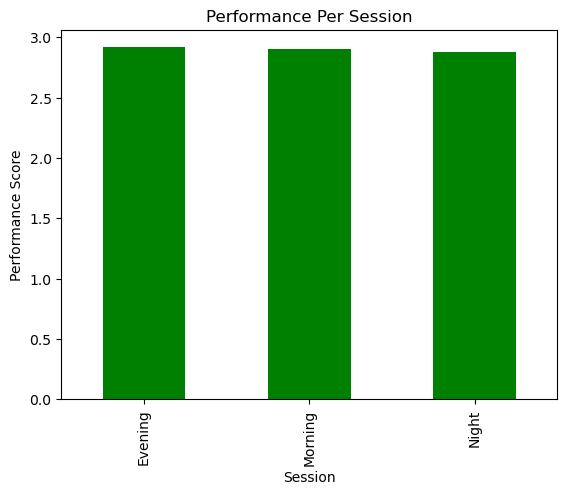

In [67]:
g12=df.groupby('Session')['Performance Score'].mean()
print(g12)
g12.plot(kind='bar', ylabel='Performance Score', title='Performance Per Session', color='g')

As seen above, the Evening session has the highest performance score at 2.917178, suggesting that individuals or processes performing during this time tend to yield better results. The Morning session follows closely with a score of 2.904192, indicating relatively high performance but slightly lower than the evening. The Night session has the lowest score of 2.882353, which may reflect challenges faced during late hours. These insights could point to factors such as energy levels, productivity patterns, or environmental influences that vary across different times of day.

## 5.10 Gender pay gap

Gender
Female    5793.078313
Male      6090.862805
Other     5871.379412
Name: Salary, dtype: float64


<Axes: title={'center': 'Gender Pay Gap'}, xlabel='Gender', ylabel='Salary'>

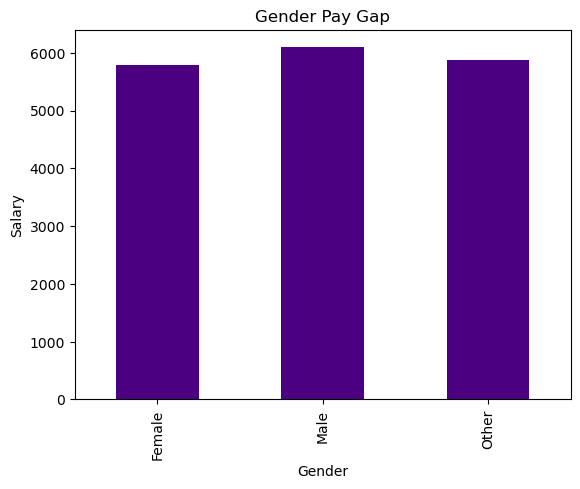

In [68]:
g10=df.groupby('Gender')['Salary'].mean()
print(g10)
g10.plot(kind='bar', ylabel='Salary', title='Gender Pay Gap', color='indigo')

The above salary data shows that male employees have the highest average salary (6090.86), followed by female employees (5793.08) and other gender (5871.38). This suggests a potential gender pay gap, with males earning more on average. While the gap isn’t extremely wide, it highlights a need for further analysis and action to ensure equal pay across genders. Addressing this disparity and creating equitable compensation structures could improve fairness and employee satisfaction across all gender groups.

## 5.11 Salaries Across Experience Level

Experience Level
Entry-level     5910.245955
Experienced     6017.043956
Intermediate    5813.162080
Name: Salary, dtype: float64


<Axes: title={'center': 'Salary against Experience Level'}, xlabel='Experience Level', ylabel='Salary'>

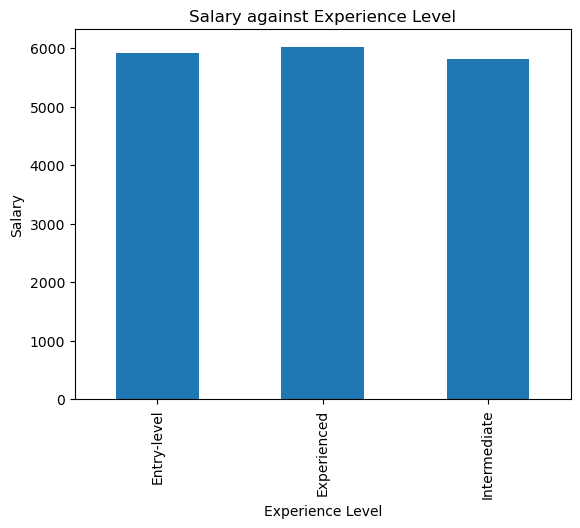

In [69]:
g11=df.groupby('Experience Level')['Salary'].mean()
print(g11)
g11.plot(kind='bar', ylabel='Salary', title='Salary against Experience Level')

The salary data above reveals that experienced employees have the highest average salary (6017.04), reflecting the value placed on their expertise and tenure within the organization. Entry-level employees earn slightly less (5910.25), which is typical as they are still building their skills and gaining experience. Intermediate employees have the lowest average salary (5813.16), possibly due to transitional roles or a plateau in their compensation as they move toward more senior positions. To optimize salary progression, the organization could ensure that intermediate-level employees receive appropriate raises and development opportunities, aligning their compensation more closely with their experience and contributions.

## 5.12 Salaries Across Sessions

Session
Evening    5861.085890
Morning    6035.616766
Night      5855.188235
Name: Salary, dtype: float64


<Axes: title={'center': 'Salary per Session'}, xlabel='Session', ylabel='Salary'>

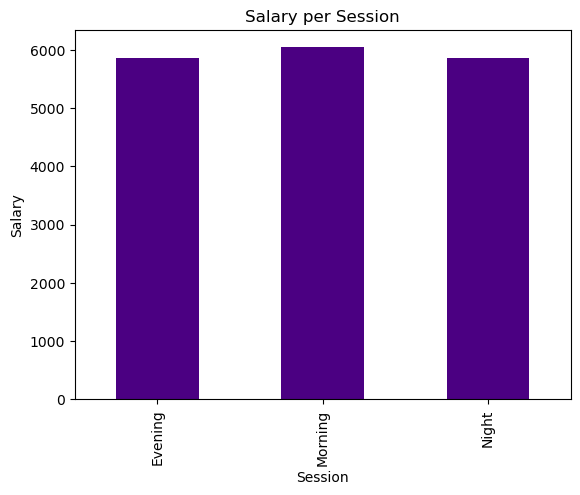

In [70]:
g13=df.groupby('Session')['Salary'].mean()
print(g13)
g13.plot(kind='bar', ylabel='Salary', title='Salary per Session', color='indigo')

As showcased by the above analysis, morning shifts have the highest average salary (6035.62), which may reflect standard working hours or roles that require more expertise. Evening shifts follow closely with an average salary of 5861.09, likely indicating positions with similar responsibilities but less demand compared to daytime hours. Night shifts have the lowest average salary (5855.19), possibly due to the nature of work or lower demand during late hours. The salary variations suggest a focus on rewarding morning shift roles, and it may be worth assessing compensation for evening and night shifts to maintain equity.

# 6.0 TIMES SERIES ANALYSIS

## 6.1 Hiring Seasonality (Quarterly)

Hiring Quarter
Q1    233
Q2    239
Q3    250
Q4    278
Name: count, dtype: int64


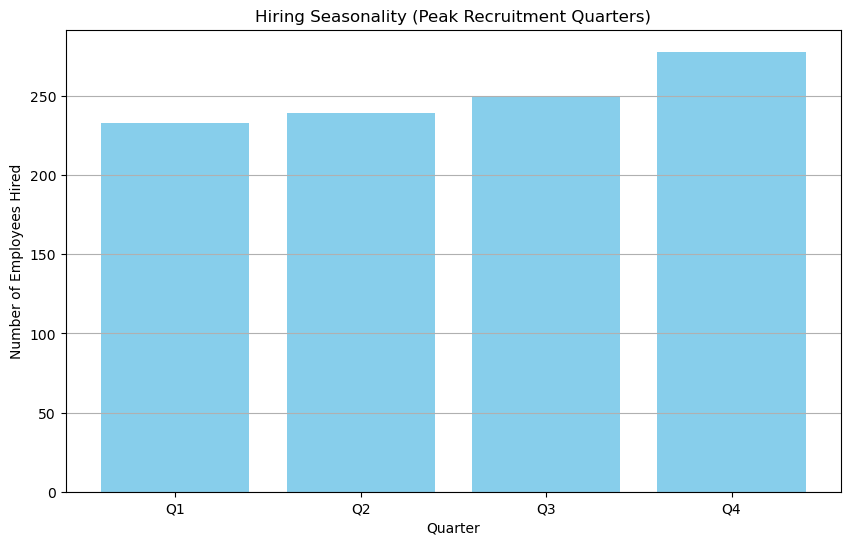

In [81]:
# Ensure Joining Date is in datetime format
df['Joining Date'] = pd.to_datetime(df['Joining Date'], format='%d/%m/%Y')

# Extract year and month from the Joining Date
df['Joining Year'] = df['Joining Date'].dt.year
df['Joining Month'] = df['Joining Date'].dt.month

# Map months to quarters (Q1: Jan-Mar, Q2: Apr-Jun, Q3: Jul-Sep, Q4: Oct-Dec)
df['Hiring Quarter'] = df['Joining Month'].apply(lambda x: f'Q{((x-1)//3)+1}')

# Group by Hiring Quarter to analyze seasonality
hiring_seasonality = df['Hiring Quarter'].value_counts().sort_index()
print(hiring_seasonality)

# Plot hiring seasonality by quarters
plt.figure(figsize=(10, 6))
plt.bar(hiring_seasonality.index, hiring_seasonality.values, color='skyblue')
plt.title('Hiring Seasonality (Peak Recruitment Quarters)')
plt.xlabel('Quarter')
plt.ylabel('Number of Employees Hired')
plt.xticks(range(0, 4), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(axis='y')
plt.show()


The above hiring analysis reveals a clear upward trend in recruitment throughout the year. Q1 (233 hires) and Q2 (239 hires) show relatively steady hiring activity. Q3 sees a slight increase (250 hires), which could be attributed to mid-year hiring adjustments or seasonal demand. However, Q4 (278 hires) experiences the highest recruitment, indicating that organizations likely ramp up hiring toward the end of the year, possibly to meet end-of-year goals or prepare for the next fiscal year. This trend suggests that Q4 is a peak season for recruitment, making it an ideal period for talent acquisition strategies.

## 6.2 Hiring Trends Over Years

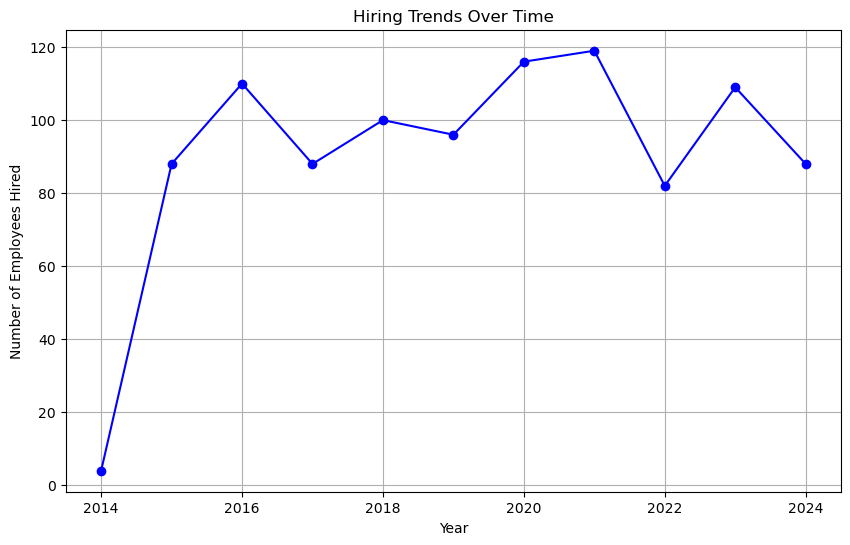

In [80]:
# Group by year to visualize hiring trends
hiring_trends = df['Joining Year'].value_counts().sort_index()

# Plot hiring trends over time
plt.figure(figsize=(10, 6))
plt.plot(hiring_trends.index, hiring_trends.values, marker='o', linestyle='-', color='blue')
plt.title('Hiring Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Employees Hired')
plt.grid(True)
plt.show()

This above graph represents the hiring trends over time, illustrating the number of employees hired each year from 2014 to 2024. It shows an overall upward trend with fluctuations. Starting from 2014, hiring increased significantly until 2016, peaking at around 120 employees. Afterward, hiring experienced slight declines in 2017 and 2018 but recovered and stabilized near the 100-employee mark from 2019 to 2020. A notable dip occurred in 2021, followed by a sharp recovery in 2022. However, hiring declined again in 2023 and 2024. These trends could indicate variations in organizational growth, economic conditions, or changes in workforce needs over the years.

## 6.3 Tenure Analysis

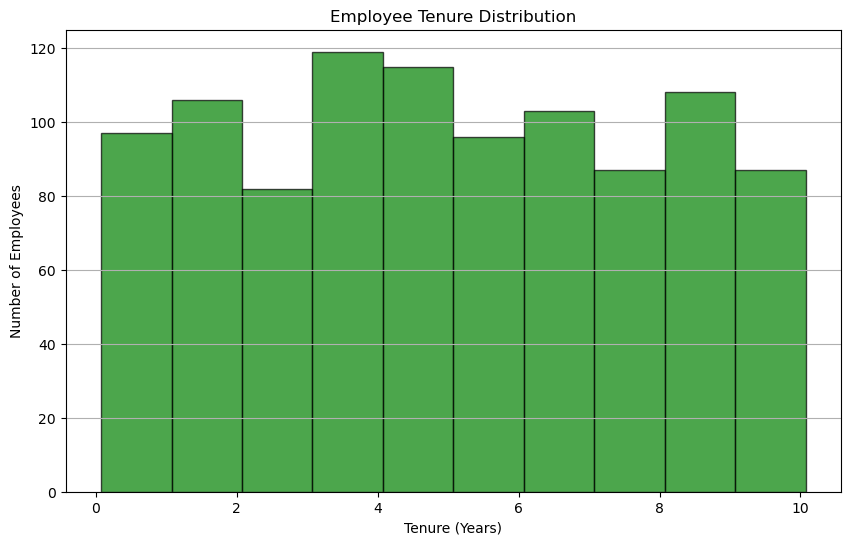

In [82]:
# Calculate and visualize employee tenure (difference between the current date and Joining Date). Compare tenure against Salary and Performance Score.
# Calculate employee tenure in years
current_date = datetime.now()
df['Tenure'] = (current_date - df['Joining Date']).dt.days / 365.0

# Visualize tenure distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Tenure'], bins=10, color='green', edgecolor='black', alpha=0.7)
plt.title('Employee Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.grid(axis='y')
plt.show()


The above uniform distribution histogram of employee tenure reveals that the organization has a relatively even spread of employees across different tenure periods. While this might seem like balanced employee retention, it could indicate a lack of long-term commitment and loyalty within the workforce. The absence of a significant concentration of long-tenured employees might reflect challenges in employee retention strategies, possibly due to inadequate career development, engagement, or recognition. This distribution could also signal high turnover, with employees not staying long enough to accumulate institutional knowledge or experience, which could hinder overall organizational stability and growth.

## 6.4 Experience over time

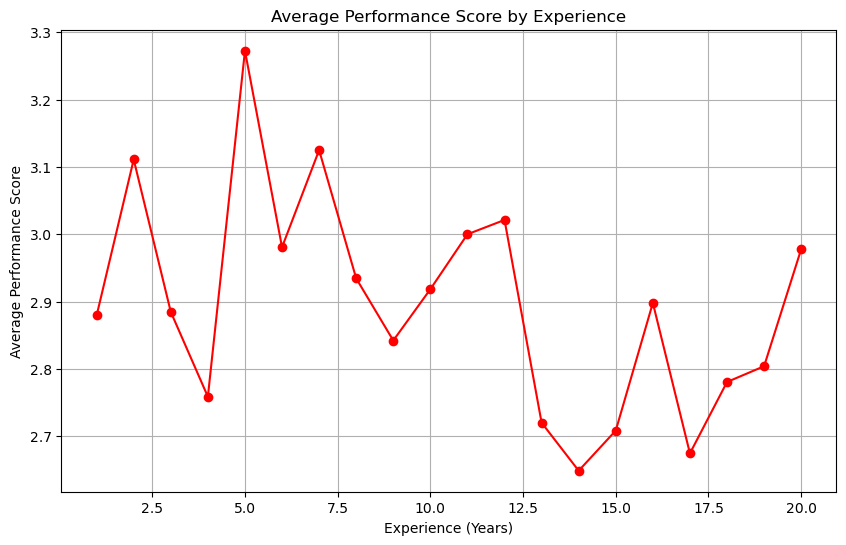

In [84]:
# Investigate average performance score by experience level
experience_performance = df.groupby('Experience')['Performance Score'].mean()

# Plot the average performance score by experience
plt.figure(figsize=(10, 6))
plt.plot(experience_performance.index, experience_performance.values, marker='o', linestyle='-', color='red')
plt.title('Average Performance Score by Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Average Performance Score')
plt.grid(True)
plt.show()

The above graph examines the relationship between employee experience (in years) and their average performance scores, revealing significant fluctuations. Employees with 2 to 5 years of experience show peak performance at 3.3 but also experience notable dips below 2.8. Performance stabilizes near 3.0 between 10 and 12 years of experience but sharply declines around 15 years, hitting a low of 2.7. Interestingly, it rebounds after 15 years, surpassing 3.0 for those with 20 years of experience.
This insight demonstrates that early-career employees may show high potential but can also be inconsistent, possibly requiring targeted training to sustain performance. Also, mid-career performance dips could indicate burnout or stagnation, emphasizing the need for skill development, growth opportunities, or role adjustments. Moreover, late-career employees demonstrate a recovery in performance, suggesting that experience and expertise become valuable assets over time.

# 7.0 CONCLUSION

This exploratory data analysis highlights the organization's strengths, including equitable pay structures, balanced workforce demographics, and consistent performance evaluations. However, challenges remain in addressing potential gender pay gaps, retaining mid-career professionals, and supporting underperforming departments or shifts. The insights gained here lay the groundwork for strategic initiatives to enhance workforce engagement, equity, and performance.

# 8.0 RECOMMENDATIONS

1. Enhance Diversity Initiatives: Continue fostering gender and generational diversity through inclusive hiring and retention practices.
2. Address Pay Disparities: Regularly review compensation structures to close gender and experience-based pay gaps.
3. Support Underperforming Teams: Provide targeted training and incentives for departments like Sales with lower performance scores.
4. Focus on Retention: Develop growth opportunities for mid-career employees to reduce turnover and increase long-term commitment.
5. Optimize Workforce Allocation: Adjust shift schedules based on productivity trends to enhance efficiency and employee satisfaction.
6. Leverage Hiring Trends: Utilize Q4 as a strategic period for recruitment while stabilizing hiring throughout other quarters.


# 9.0 REFERENCES

1. Shields, J., Brown, M., Kaine, S., Dolle-Samuel, C., North-Samardzic, A., McLean, P., ... & Robinson, J. (2015). Managing employee performance & reward: Concepts, practices, strategies. Cambridge University Press.
2. Kaggle (2025). Employee Performance and Salary Dataset. Available online at: [Kaggle Dataset](https://www.kaggle.com/datasets/nadeemajeedch/employee-performance-and-salary-dataset)
